In [1]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
def read(txt_file):
    x = []
    y = []
    f = open(txt_file, "r")
    lines = f.readlines()
    for line in lines:
        line_splitted = [line.rsplit(" ")[0], line.rsplit(" ")[1]]
        x.append(float(line_splitted[0]))
        y.append(float(line_splitted[1]))
    f.close
    return x, y

x, y1 = read("1.txt")
_, y2 = read("2.txt")
_, y3 = read("3.txt") 

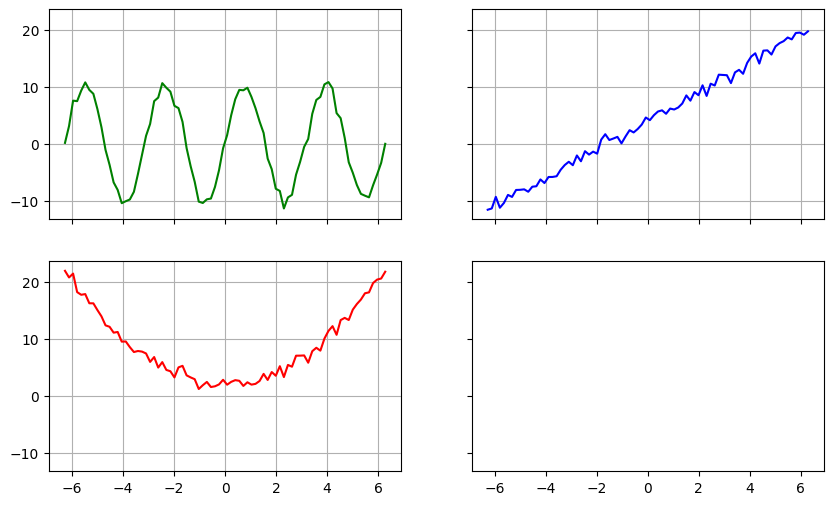

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6), facecolor="white", sharey=True, sharex=True)

axs[0, 0].plot(x, y1, "g") #sin
axs[0, 1].plot(x, y2, "b") #lineáris
axs[1, 0].plot(x, y3, "r") #négyzet

axs[0, 0].grid(visible=True, axis="both")
axs[0, 1].grid(visible=True, axis="both")
axs[1, 0].grid(visible=True, axis="both")

plt.show()

In [4]:
def sin_f(x, a, b): #sin
    return a * np.sin(b * x)

def lin(x, a, b): #lineáris
    return a * x + b

def square_f(x, a, b): #négyzet
    return a * (x ** 2) + b

In [19]:
popt1, pcov1 = curve_fit(sin_f, x, y1) #sin
perr1        = np.sqrt(np.diag(pcov1))

popt2, pcov2 = curve_fit(lin, x, y2) #lineáris
perr2        = np.sqrt(np.diag(pcov2))

popt3, pcov3 = curve_fit(square_f, x, y3) #négyzet
perr3        = np.sqrt(np.diag(pcov3))

x_for_fitted = np.linspace(-50, 50, 300)

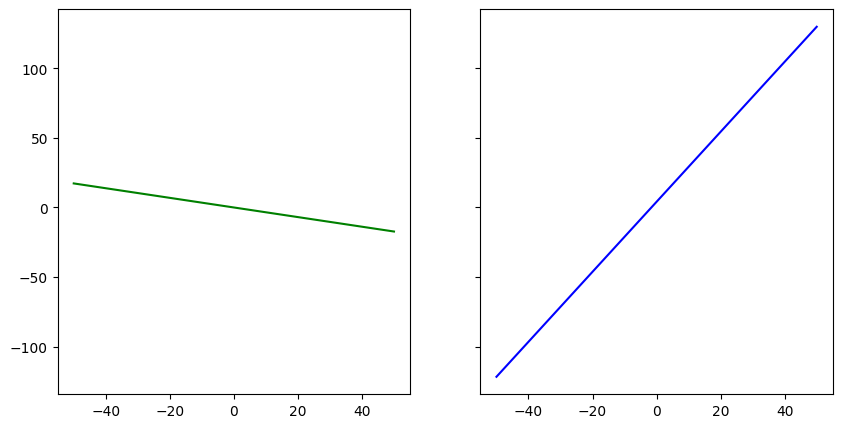

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), facecolor="white", sharey=True, sharex=True)

axs[0].plot(x_for_fitted, sin_f(x_for_fitted, popt1[0], popt1[1]), color="green")#, label = f"{round(popt1, 2)}*x+{round(popt1, 2)}") #sin
axs[1].plot(x_for_fitted, lin(x_for_fitted, popt2[0], popt2[1]), color="blue")#, label = f"{round(popt2, 2)}*x+{round(popt2, 2)}") #lineáris


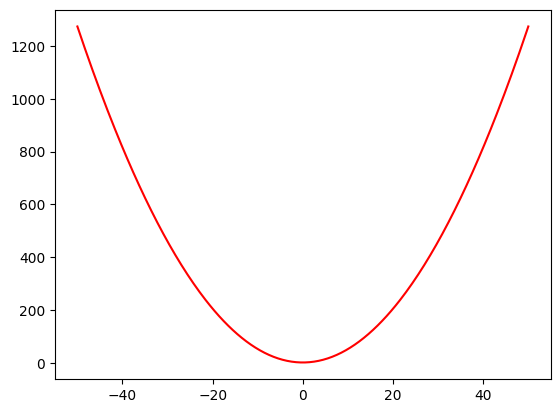

In [22]:
plt.plot(x_for_fitted, square_f(x_for_fitted, popt3[0], popt3[1]), color="red")#, label = f"{round(popt3, 2)}*x+{round(popt3, 2)}") #hatvány

plt.show()